In [1]:
# Stock Prices Data Set

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/vijay/Codeveda Intern/Task 2 Dataset/Stock Prices Data Set.csv")

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Column names cleaned.")

Column names cleaned.


In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64


In [6]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")


Duplicate rows found: 0


In [7]:
df_cleaned = df.drop_duplicates()
print(f"Removed duplicates. New shape: {df_cleaned.shape}")

Removed duplicates. New shape: (497472, 7)


In [8]:
print(f"Remaining duplicates: {df_cleaned.duplicated().sum()}")

Remaining duplicates: 0


In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Create a copy BEFORE filling
df_before = df.copy()

# Step 3: Apply forward fill to a new DataFrame
df_filled = df.copy()
df_filled = df_filled.fillna(method='ffill')

# Step 4: Compare where missing values were filled
filled_positions = df_before.isnull() & df_filled.notnull()

# Step 5: Show only rows where something was filled
filled_rows = df_filled[filled_positions.any(axis=1)]

# Step 6: Print result
print("Missing values filled using forward fill:")
print(filled_rows)

Missing values filled using forward fill:
       symbol        date    open    high     low     close   volume
166348   VRTX  2015-05-12   63.11  63.920  62.850  124.0800   569747
175557   REGN  2015-06-09   77.47  77.740  76.605  526.0900    12135
182011    WRK  2015-06-26   46.98  47.190  46.820   61.9000      100
188547    DHR  2015-07-17   27.64  88.760  88.240   88.7200  2056819
188578     ES  2015-07-17  223.72  48.490  47.850   47.9200  1246786
188760      O  2015-07-17   72.19  47.310  46.830   46.9900  1229513
249223    DHR  2016-01-12   28.00  28.390  27.410   88.5500        0
249438      O  2016-01-12   61.42  61.880  58.820   52.4300        0
278801     UA  2016-04-07   54.55  54.662  52.930   41.5600        0
308365    FTV  2016-07-01   26.97  27.480  26.970   49.5400        0
442107    BHF  2017-07-26   49.02  49.100  48.505   69.0842        3


In [10]:
#Interpretation
#1. Missing Values Detected:
#Columns open, high, and low had a small number of missing values (11, 8, and 8 respectively).

#These columns represent daily price information — and missing them can distort financial analysis, especially in time series.

#2. Forward Fill Applied:
#We used .fillna(method='ffill'), which replaces missing values with the last available valid value from the previous row.

#3. Effect of Filling:

#The dataset still preserves its original structure: no rows were dropped.

#Now ready for accurate time series analysis without NaN errors.

In [11]:
#Level 1 – Task 3: Basic Data Visualization

#Using basic visualizations to summarize trends in the stock data.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Stock Prices Data Set.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Handle missing values (if not done earlier)
df.fillna(method='ffill', inplace=True)

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

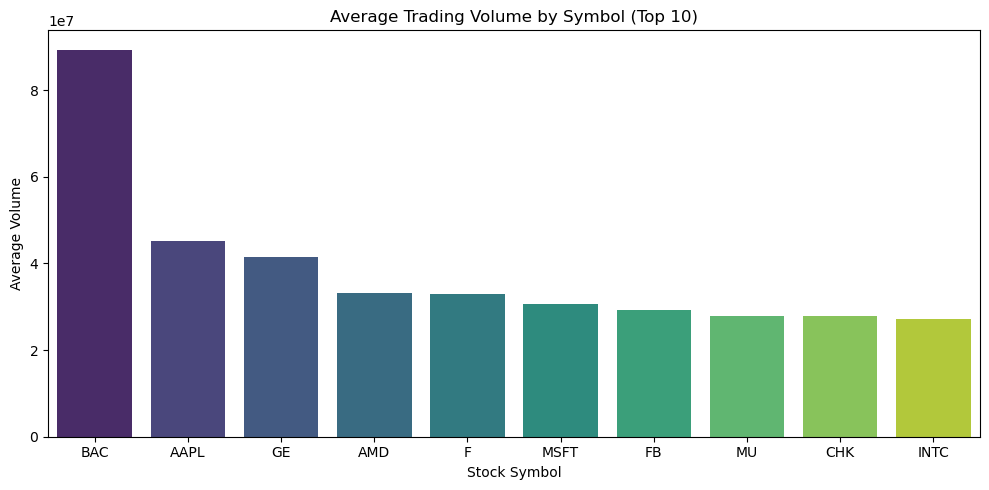

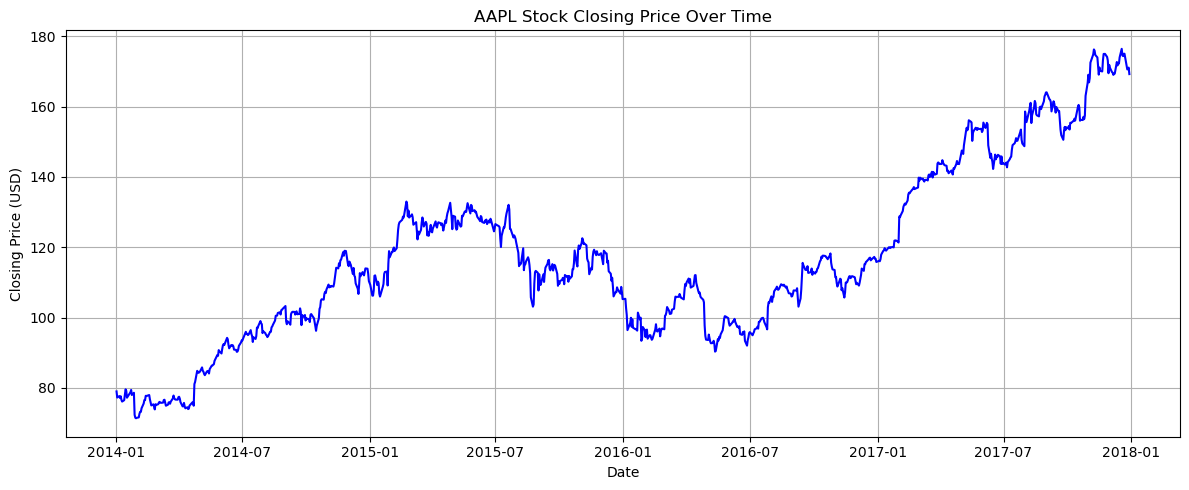

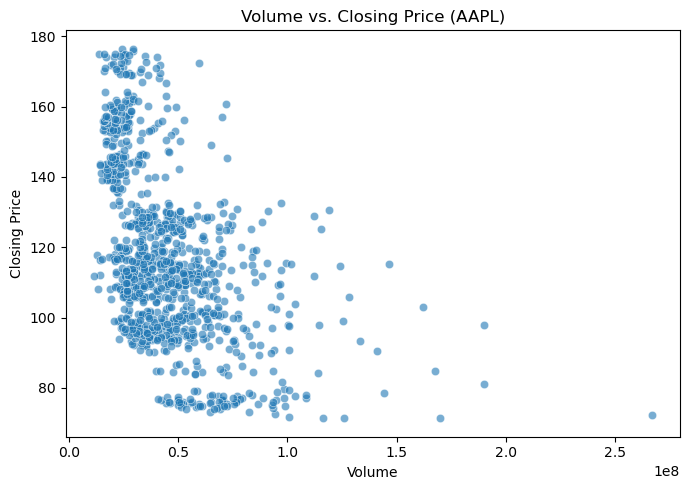

In [13]:
# Bar Chart: Average trading volume by symbol
plt.figure(figsize=(10, 5))
avg_volume = df.groupby('symbol')['volume'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_volume.index, y=avg_volume.values, palette='viridis')
plt.title("Average Trading Volume by Symbol (Top 10)")
plt.ylabel("Average Volume")
plt.xlabel("Stock Symbol")
plt.tight_layout()
plt.savefig("avg_volume_by_symbol.png")
plt.show()

# Line Chart: AAPL closing price over time
aapl_df = df[df['symbol'] == 'AAPL'].sort_values('date')
plt.figure(figsize=(12, 5))
plt.plot(aapl_df['date'], aapl_df['close'], label='AAPL Closing Price', color='blue')
plt.title("AAPL Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("aapl_closing_price.png")
plt.show()

# Scatter Plot: Volume vs. Closing Price for AAPL
plt.figure(figsize=(7, 5))
sns.scatterplot(data=aapl_df, x='volume', y='close', alpha=0.6)
plt.title("Volume vs. Closing Price (AAPL)")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.tight_layout()
plt.savefig("aapl_volume_vs_close.png")
plt.show()

In [14]:
#Symbol-level summary (bar chart)

#Time-based trend (line chart)

#Price-volume relationship (scatter plot)

In [15]:
#Level 2 – Task 2: Time Series Analysis (Stock Dataset)

#Explore price trends over time

#Visualize moving averages

#Optionally decompose the time series into trend, seasonality, and residual

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

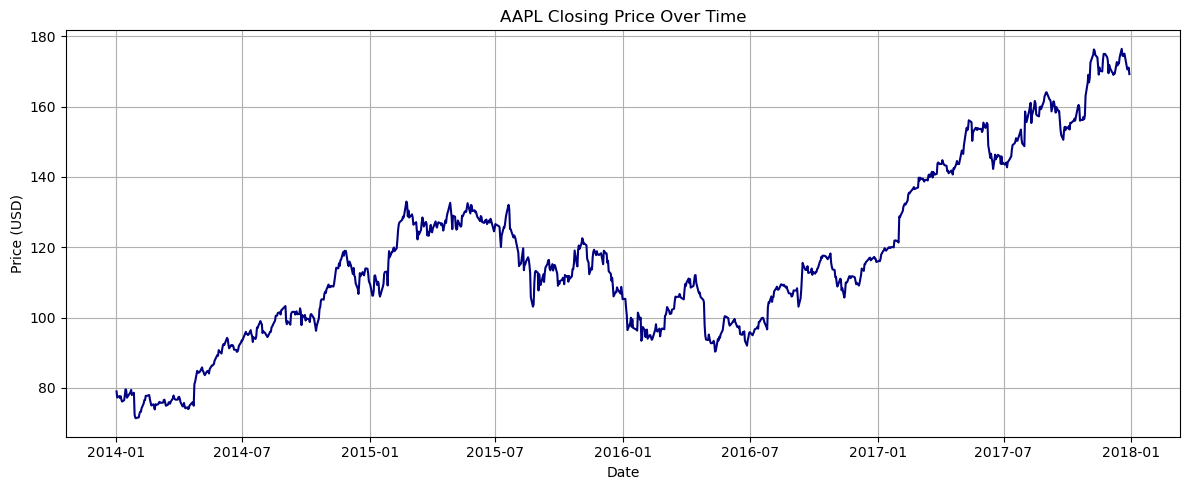

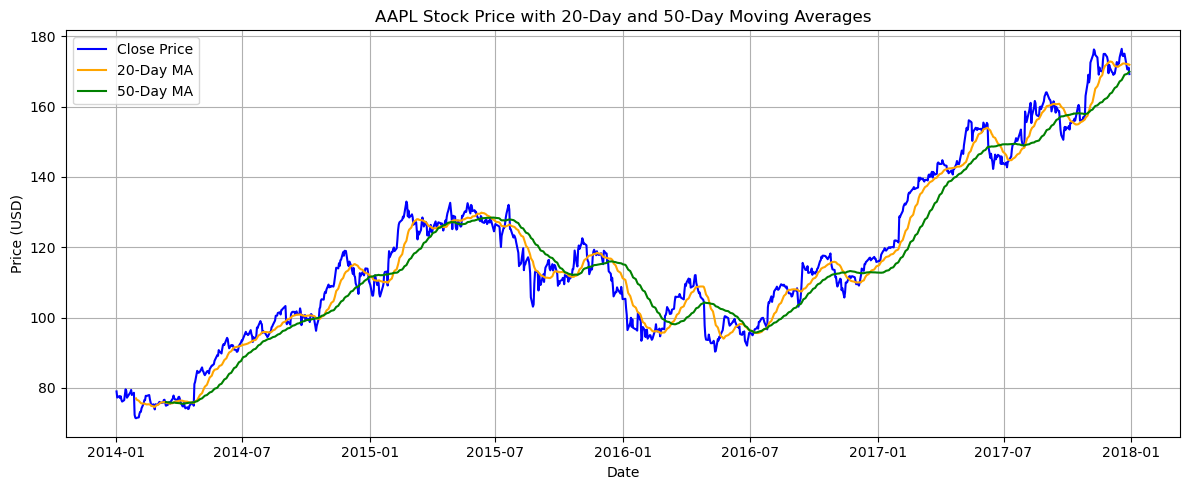

In [19]:
aapl = df[df['symbol'] == 'AAPL'].sort_values('date')
# Plot 1: Closing Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(aapl['date'], aapl['close'], label='AAPL Close Price', color='navy')
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("aapl_closing_price_timeseries.png")
plt.show()

# Plot 2: Moving Averages (20-day and 50-day)
aapl['MA_20'] = aapl['close'].rolling(window=20).mean()
aapl['MA_50'] = aapl['close'].rolling(window=50).mean()

plt.figure(figsize=(12, 5))
plt.plot(aapl['date'], aapl['close'], label='Close Price', color='blue')
plt.plot(aapl['date'], aapl['MA_20'], label='20-Day MA', color='orange')
plt.plot(aapl['date'], aapl['MA_50'], label='50-Day MA', color='green')
plt.title("AAPL Stock Price with 20-Day and 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("aapl_with_moving_averages.png")
plt.show()

In [20]:
#Interpretation (Add to Report)

#Plot 1: AAPL Closing Price Over Time
#Shows real daily stock performance from the raw data.

#Highlights long-term upward/downward trends, volatility, and periods of stability.

#Great for understanding general stock movement over time.

#Plot 2: AAPL with Moving Averages
#Adds technical indicators:

#    20-day MA (short-term trend)

#    50-day MA (mid-term trend)

#Smooths the noise in price movement.

#Helpful for:

#    Identifying trend direction

#    Detecting crossovers (bullish or bearish signals)

C:\Users\vijay\AppData\Local\Temp\ipykernel_13624\2216674292.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


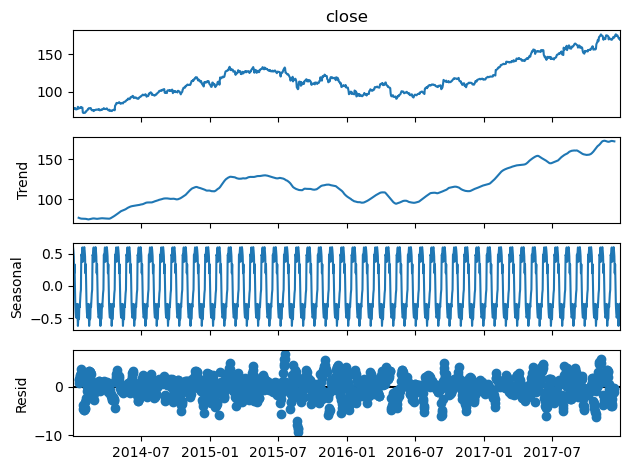

In [21]:
# Set 'date' as index and resample to daily frequency
aapl_ts = aapl.set_index('date')['close']
aapl_ts = aapl_ts.asfreq('D')  # fill in missing calendar days
aapl_ts = aapl_ts.interpolate()  # fill gaps to prepare for decomposition

# Decompose the time series
result = seasonal_decompose(aapl_ts, model='additive', period=30)

# Plot the decomposition results
result.plot()
plt.tight_layout()
plt.savefig("aapl_decomposition.png")
plt.show()

In [22]:
#Interpretation
#Observed
#This is the original closing price series (as seen in the earlier plot).

#Trend
#Shows the long-term upward/downward movement.

#Helps remove short-term fluctuations.

#Seasonality
#Captures repeating monthly cycles.

#Useful in identifying market behavior patterns that repeat regularly.

#Residual
#Captures random noise or irregular changes.

#Can be used to check how well the trend + seasonal components explain the data.

In [23]:
# code for cleaned CSV file for the Power BI dashboard
df['date'] = pd.to_datetime(df['date'])
df.fillna(method='ffill', inplace=True)

# Optionally add moving averages (for one stock like AAPL)
aapl = df[df['symbol'] == 'AAPL'].sort_values('date')
aapl['ma_20'] = aapl['close'].rolling(window=20).mean()
aapl['ma_50'] = aapl['close'].rolling(window=50).mean()

# Save complete and AAPL data separately
df.to_csv("stock_dataset_cleaned.csv", index=False)
aapl.to_csv("aapl_with_moving_averages.csv", index=False)
print("CSV files saved for Power BI.")

CSV files saved for Power BI.
